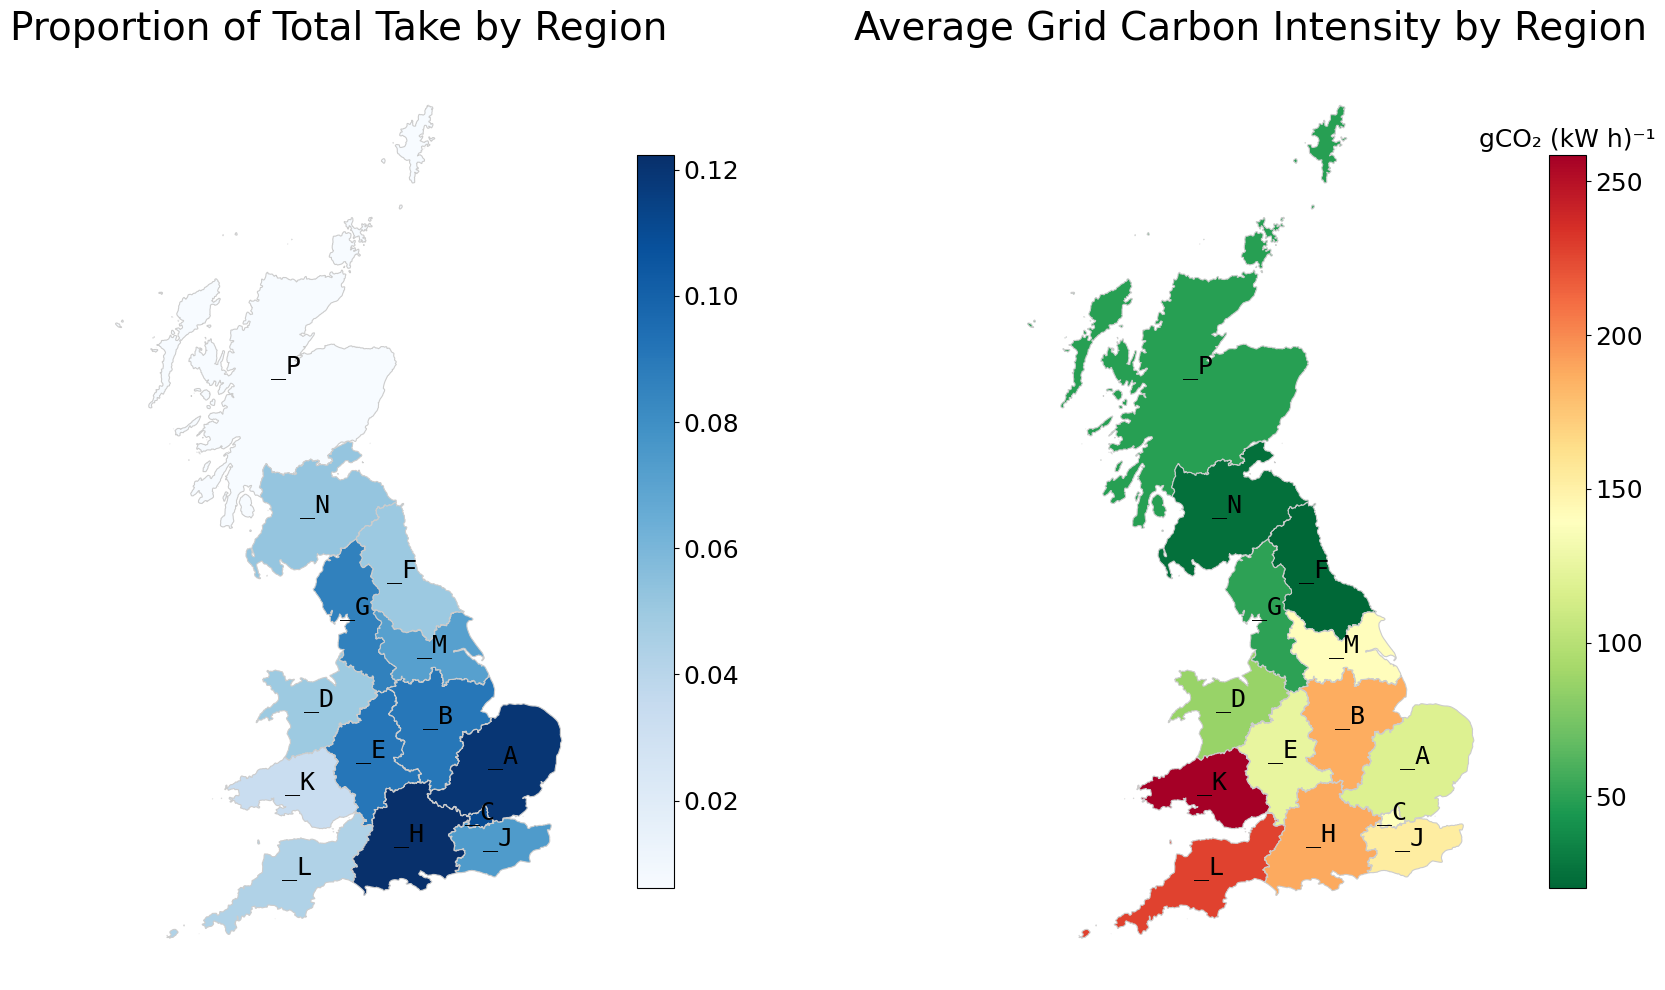

In [16]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# === PATHS ===
shapefile_path = r"C:\Users\spice\Dropbox\Documents\Imperial 2024.2025\MECH70038 - Research Projects\_My Thesis\Data\GB Shape File\dno_license_areas_20200506\DNO_License_Areas_20200506.shp"
csv_path = r"C:\Users\spice\Dropbox\Documents\Imperial 2024.2025\MECH70038 - Research Projects\_My Thesis\Data\Region Shape Chart Data.csv"

# === LOAD SHAPEFILE AND CSV ===
gdf = gpd.read_file(shapefile_path)
df_emissions = pd.read_csv(csv_path)

# Check required columns
required_cols = ['Name', 'AEF', 'Take Pct']
for col in required_cols:
    assert col in df_emissions.columns, f"'{col}' column not found in CSV"

# === MERGE ON 'Name' ===
gdf_merged = gdf.merge(df_emissions[['Name', 'AEF', 'Take Pct']], on='Name', how='left')

# === CREATE SUBPLOTS ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# === PLOT 1: Take Percentage ===
plot1 = gdf_merged.plot(
    column='Take Pct',
    cmap='Blues',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    ax=ax1,
    legend_kwds={'shrink': 0.8},
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing data"
    }
)
ax1.set_title('Proportion of Total Take by Region', fontsize=28)
ax1.axis('off')

# Colorbar font size
cbar1 = plot1.get_figure().get_axes()[2]
cbar1.tick_params(labelsize=18)
cbar1.set_title("", fontsize=18)

# Labels
for idx, row in gdf_merged.iterrows():
    if pd.notnull(row['Take Pct']):
        centroid = row['geometry'].centroid
        ax1.text(centroid.x, centroid.y, row['Name'], fontsize=18, ha='center', fontfamily='monospace')

# === PLOT 2: AEF ===
plot2 = gdf_merged.plot(
    column='AEF',
    cmap='RdYlGn_r',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    ax=ax2,
    legend_kwds={'shrink': 0.8},
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing data"
    }
)
ax2.set_title('Average Grid Carbon Intensity by Region', fontsize=28)
ax2.axis('off')

# Colorbar font size
cbar2 = plot2.get_figure().get_axes()[3]  # second colorbar is third axis
cbar2.tick_params(labelsize=18)
cbar2.set_title("gCO₂ (kW h)⁻¹", fontsize=18)

# Labels
for idx, row in gdf_merged.iterrows():
    if pd.notnull(row['AEF']):
        centroid = row['geometry'].centroid
        ax2.text(centroid.x, centroid.y, row['Name'], fontsize=18, ha='center', fontfamily='monospace')

# === LAYOUT ===
plt.tight_layout()
plt.show()
